# Workflow for building temperature Profiles

In [68]:
##Import Libraries##
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3
from pandas import DataFrame, Series  # for convenience
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pims
import trackpy as tp
import cv2
import os
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches
from scipy.stats import norm
from scipy.interpolate import interp1d
import statistics
from matplotlib.widgets import Slider
import random

In [2]:
default_rc = dict(mpl.rcParams) #safe the default plotting settings into a variable

In [3]:
##Optionally, tweak styles.##
mpl.rc('figure',  figsize=(10, 10*(1236/1376))) #400/375
mpl.rc('image', cmap='gray')

In [4]:
scl = 1236/1376 #!!!INPUT

In [5]:
##Optionally, tweak styles.##
mpl.rc('figure',  figsize=(10, 10*(1236/1376))) #400/375
mpl.rc('image', cmap='gray')

##______________________________________________________________________________________________________________________________________________##

###Convert Video to Image Sequence and save to directory###

#File path of video that needs converted
folderPath = r'g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs'
#folderPath = r'g:\My Drive\workAppState\prj_shocks\expData\data20230322velDistribTest_Connor\inputs'
#Filepath for directory to save image sequence
videoName = r'\2mA_420V_12sccm_111mtorr_135volt_bias'
#Video Type
vidType = '.avi'
#Image Type
imgType = '.png'

##CODE DOES NOT NEED ALTERED FOR VIDEO/IMAGE-SEQUENCE CONVERTER PAST THIS POINT
#Read the video from specified path
    
cam = cv2.VideoCapture(folderPath + r'\Video' + videoName + vidType)
  
try:
      
    # creating a folder named 
    direcPath = folderPath + r'\ImageSequences' + videoName
    if not os.path.exists(direcPath):
        os.makedirs(direcPath)
  
# if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  
# frame
currentframe = 0
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = direcPath + r'\frame' + str(currentframe) + imgType
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

##______________________________________________________________________________________________________________________________________________##

###Create Directory for Plots###

if not os.path.exists(folderPath + r'\Plots' + videoName):
    os.makedirs(folderPath + r'\Plots' + videoName)
    

##______________________________________________________________________________________________________________________________________________##

###Import image sequence and convert to grayscale###

#Define function that converts to grayscale
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel


#Creates an array for grayscale frames
frames = []



Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame0.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame1.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame2.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame3.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame4.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame5.png
Creating...g:\My Drive\workAppStat

Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame51.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame52.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame53.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame54.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame55.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame56.png
Creating...g:\My Drive\workA

Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame102.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame103.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame104.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame105.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame106.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame107.png
Creating...g:\My Drive

Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame154.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame155.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame156.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame157.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame158.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame159.png
Creating...g:\My Drive

Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame205.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame206.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame207.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame208.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame209.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame210.png
Creating...g:\My Drive

Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame258.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame259.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame260.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame261.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame262.png
Creating...g:\My Drive\workAppState\prj_shocks\expData\data20230419temperatureProfileTest\inputs\ImageSequences\2mA_420V_12sccm_111mtorr_135volt_bias\frame263.png
Creating...g:\My Drive

 
View of current image before cropping provided in plots tab
 


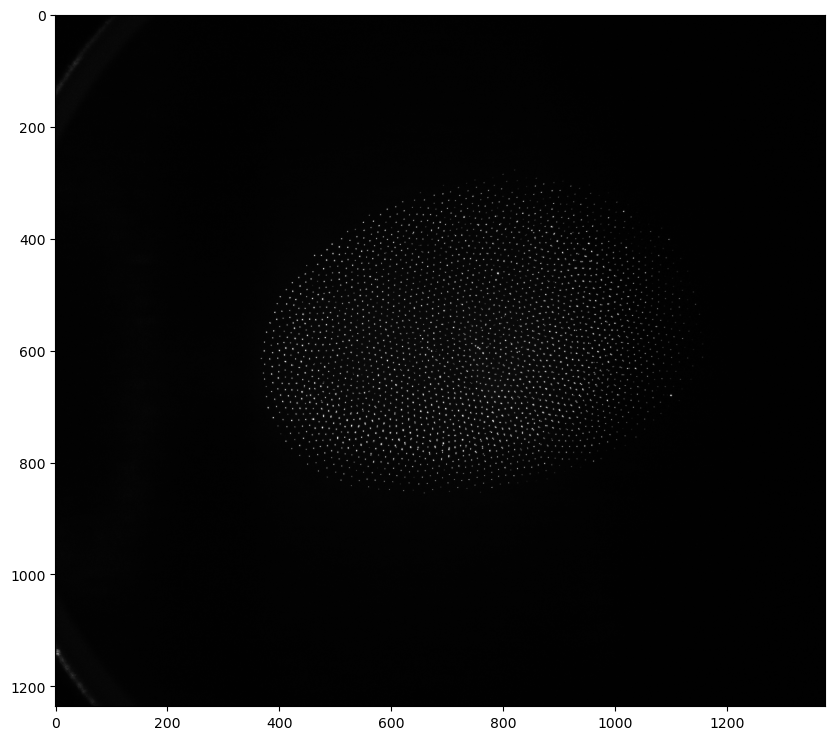

Recommended starting scale is x=525:900 y=375:775
(Press enter when prompted for input to use recommended scale)


In [6]:
#Access first image in directory as test image
testim = gray(cv2.imread(direcPath + r'\frame' + str(0) + imgType))
print(" ")
print("View of current image before cropping provided in plots tab")
print(" ")
plt.imshow(testim)
plt.show()
#Pauses and closes plot for auto grapic mode (not needed for inline mode)
#plt.pause(pause time)
plt.pause(5)
plt.close()
print("Recommended starting scale is x=525:900 y=375:775")
print("(Press enter when prompted for input to use recommended scale)")

Input min x pixel coordinate: 525
Input max x pixel coordinate: 900
Input min y pixel coordinate: 375


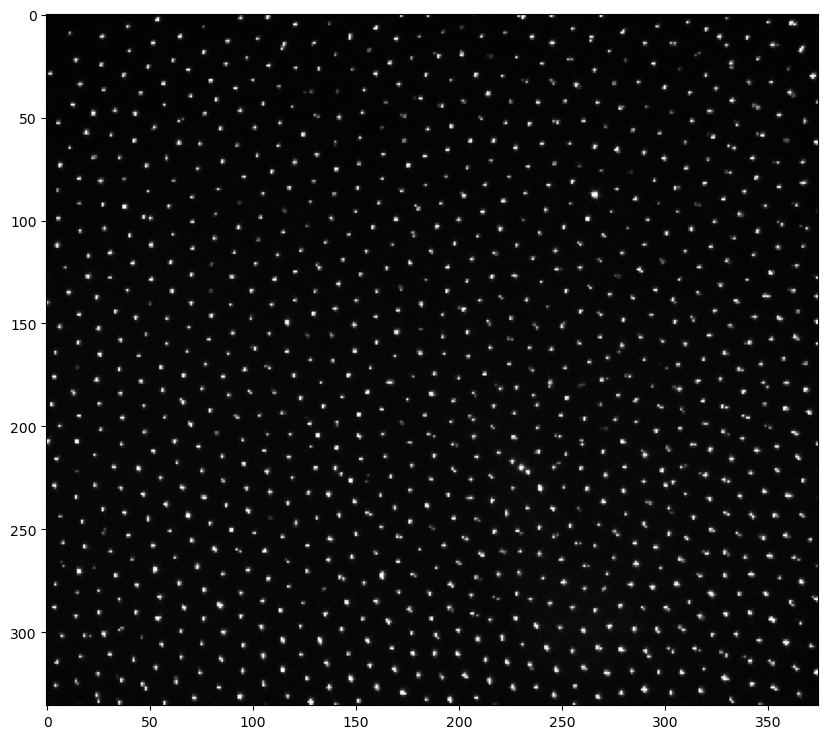

Would you like to reset scale? (yes or no): no


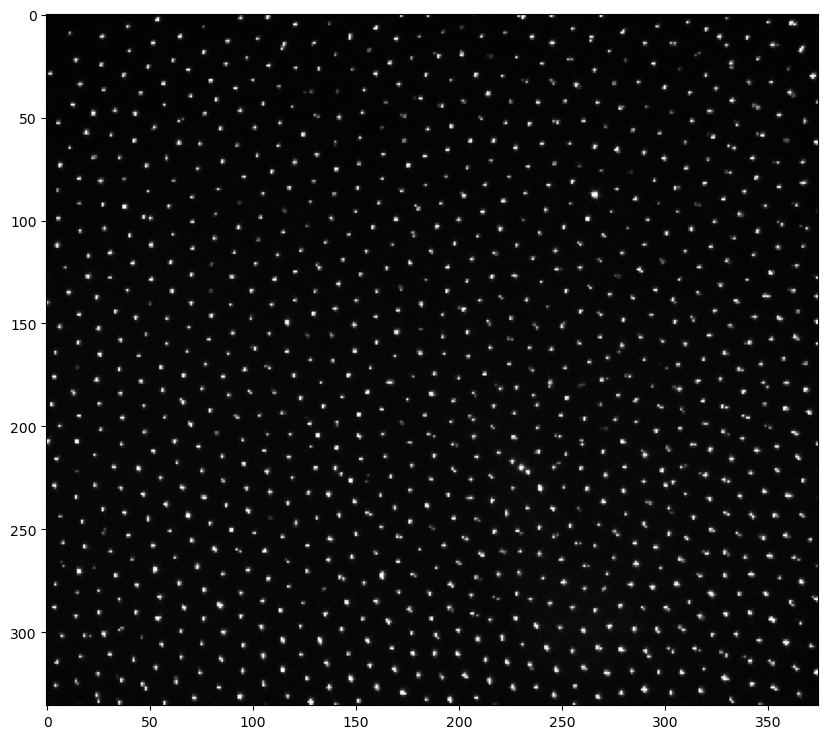

In [7]:
#Loop to test cropping scale and then apply to entire directory
while True:
    #Input for cropping scale
    xFrames1 = int(input("Input min x pixel coordinate: ") or "550")
    xFrames2 = int(input("Input max x pixel coordinate: ") or "925")
    yFrames1 = int(input("Input min y pixel coordinate: ") or "450")
    yFrames2 = int(((xFrames2-xFrames1)*(scl))+yFrames1)
    #Crops test images
    exFrame = testim[yFrames1:yFrames2, xFrames1:xFrames2]
    #Shows cropped image
    plt.imshow(exFrame)
    plt.show()
    #Pauses and closes plot for auto grapic mode (not needed for inline mode)
    plt.pause(5)
    plt.close()
    #Request to proceed
    answer = input("Would you like to reset scale? (yes or no): ")
    #If/Else statement to restart or break loop depending on input
    if answer=="yes":
        #Restarts loop for new crop scale
        continue 
    else:
        #Loop to apply cropping to all images in directory
        for i in range(currentframe):
            #Access image in directory
            im = gray(cv2.imread(direcPath + r'\frame' + str(i) + imgType))
            #Crops image and saves to array
            frames.append(im[yFrames1:yFrames2, xFrames1:xFrames2])
        
        #ends the loop
        break

#Show first frame in cropped image array
plt.imshow(frames[0])

 
Recommended starting values for tp.locate(): PixSize=3, minmass=15, seperation=3, threshhold=0, invert=False
(Press enter when prompted for input to use recommended values)
Frame number: 50
Feature size in pixels (odd#>2): 3
Minmass: 15
Seperation: 3
Threshold: 0
Invert: False
Head of DataFrame: 
           y           x       mass      size       ecc     signal  raw_mass  \
1   0.833333  229.880952  18.718938  0.545545  2.240000  13.147825     937.0   
9   2.811060  186.751152  24.178628  0.740532  1.134454  10.919380    1112.0   
11  2.865385  205.705128  17.381871  0.655353  1.701493   9.916580    1188.0   
12  2.863636  244.965035  31.866763  0.786690  0.271186  12.145025     821.0   
13  2.698039  268.835294  28.412674  0.833137  0.570621   8.690935    1017.0   

          ep  
1  -0.075847  
9  -0.198112  
11 -0.660519  
12 -0.053827  
13 -0.105655  


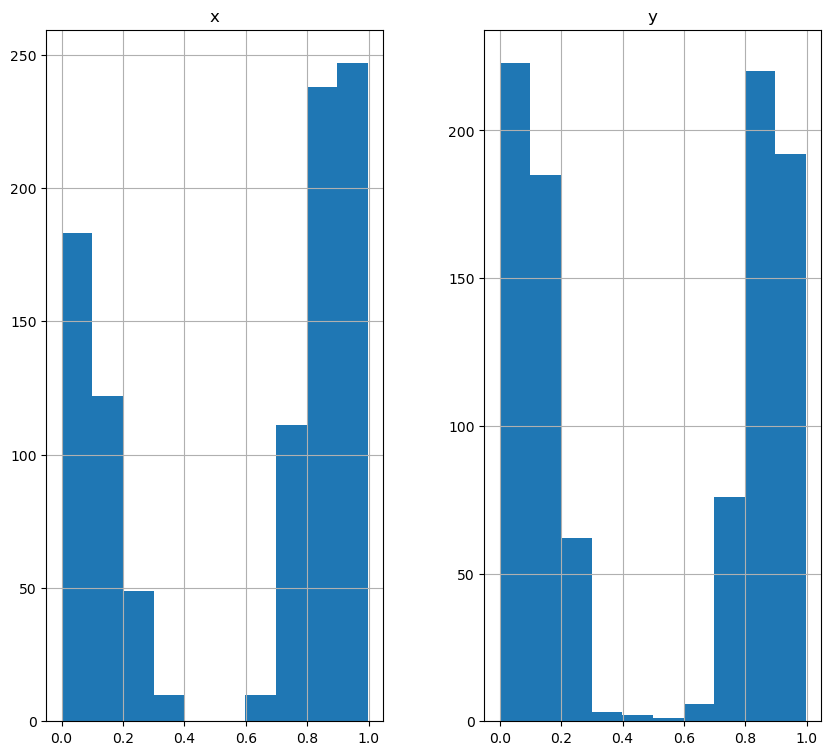

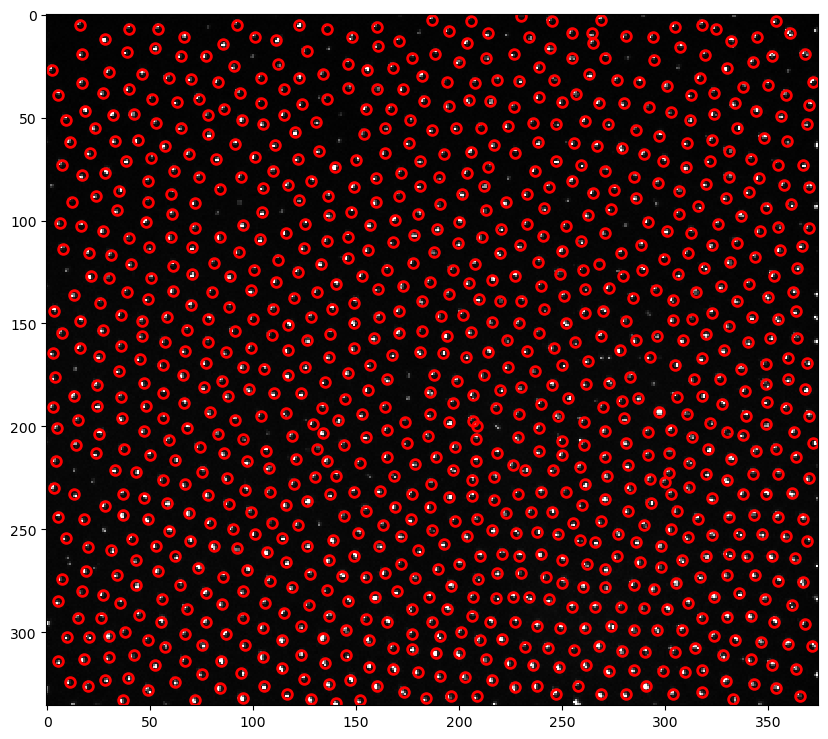

Would you like to change values? (yes or no): no


In [8]:
##______________________________________________________________________________________________________________________________________________##

###Locate Features for single frame###
    
print(" ")
print("Recommended starting values for tp.locate(): PixSize=3, minmass=15, seperation=3, threshhold=0, invert=False")
print("(Press enter when prompted for input to use recommended values)")
#Loop to test locate feature variables and then apply to entire directory
while True:
    ##Locating pixels
    #Asking for input from user for locate feature, if no input use recommended settings
    fra = int(input("Frame number: ") or "0")
    pix = int(input("Feature size in pixels (odd#>2): ") or "3")
    minM = int(input("Minmass: ") or "10")
    sep = int(input("Seperation: ") or "5")
    thresh = int(input("Threshold: ") or "0")
    inv = input("Invert: ") or "False"
    #Locates particles using defined settings
    #tp.locate(frame,estimated feature size in pixels, minmass removes features below value, invert frame color)
    fSing = tp.locate(frames[fra], pix, minmass=minM, separation=sep, threshold=thresh, invert=inv)
    #prints data head
    print("Head of DataFrame: ")
    print(fSing.head(5))
    
    ##Check the subpixel accuracy
    #This checks that decimal part of the x and or position are evenly distributed
    #If mask size is too small, histogram shows dip in middle
    tp.subpx_bias(fSing)
    plt.show()
    #Pauses and closes plot for auto grapic mode (not needed for inline mode)
    plt.pause(1)
    plt.close()
    ##Create plot and circles features
    fig = plt.figure()
    tp.annotate(fSing, frames[fra],plot_style={'markersize':7}) 
    plt.show()
    plt.pause(30)
    plt.close()
    #Save fig (only works in inline mode due to trackpy)
    fig.savefig(folderPath + r'\Plots' + videoName + r'\Annotation' + imgType)

    ##Request to proceed
    answer2 = input("Would you like to change values? (yes or no): ") or "yes"
    if answer2 == "yes":
        #Restarts loop for new values
        continue 
    else:
        #ends the loop
        break

In [10]:
##______________________________________________________________________________________________________________________________________________##

###Link features into Particle Trajectories###

#Batch of frames
fTraj = tp.batch(frames[:], pix, minmass=minM, separation=sep, threshold=thresh, invert=inv)
#Convert and save data to CSV
fTraj.to_csv(folderPath + r'\csvData' + videoName + r'.csv')

##Track particle from frame to frame
# Turn off progress reports for best performance
tp.quiet()
#tp.link(batch frames, max distance in pixels particle can travel betwen frame, 
#        number of frames memory maintains ID for disappeared particles)
t = tp.link(fTraj,3,memory=1)
#Head of new DataSet
t.head()

Frame 276: 984 features


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,2.288770,107.893048,22.423790,0.670222,0.940476,12.351072,712.0,-0.045687,0,0
638,226.921397,186.209607,27.460149,0.735856,1.556452,12.590898,1018.0,-0.115125,0,1
639,226.779736,205.259912,27.220323,0.705548,1.123894,13.670118,1045.0,-0.132956,0,2
640,226.855769,368.000000,37.412955,0.770032,0.313514,15.228991,783.0,-0.053121,0,3
641,228.176259,23.931655,33.335902,0.753887,0.202532,14.389598,868.0,-0.065973,0,4


In [11]:
#function get_velocities(df, step) calculates velocites of particles
# with a given step step.
def get_velocities(df, step):
#initialize empy arrays to store data:
    arr_particle = np.array([])
    arr_x = np.array([])
    arr_y = np.array([])
    arr_vx = np.array([])
    arr_vy = np.array([])
    arr_frame = np.array([])
    # get an array containing all frame numbers in the input dataframe:
    frames_listing = np.unique(np.array(df['frame']))
    #cycle throught all those frames:
    for iFrame in range(step, len(frames_listing)):
        #get current frame:
        cur_frame = frames_listing[iFrame]
        #select a dataframe containing data ONLY for that frame:
        df_front_frame = df[(df['frame'] == cur_frame)]
        #print(iFrame)
        #cycle throught all particles in the frame and find their velocities as
        # position of the particle in that frame minus position of the same particles
        # step frames ago:
        for i in range(0, len(df_front_frame)):
            #take i-th particle in a frame
            cur_p = df_front_frame['particle'].iloc[i]
            cur_x = df_front_frame['x'].iloc[i]
            cur_y = df_front_frame['y'].iloc[i]
            #find a row with the same particle in a frame step frames ago:
            prev_frame_cur_row = df[((df['frame'] == cur_frame - step) & (df['particle'] == cur_p))]
            #if that particle excisted back then, we will get exactly ONE row:
            if (len(prev_frame_cur_row) == 1):
                #if this row exists, we can take position of that particle in that, previous, frame:
                prev_x = prev_frame_cur_row['x'].iloc[0]
                prev_y = prev_frame_cur_row['y'].iloc[0]
                # so we can calculate velocities:
                cur_vx = cur_x - prev_x
                cur_vy = cur_y - prev_y
                cur_particle = df_front_frame['particle'].iloc[i]
                #and append all parameters of that particle to our data arrays
                arr_vx = np.append(arr_vx, cur_vx)
                arr_vy = np.append(arr_vy, cur_vy)
                arr_particle = np.append(arr_particle, cur_particle)
                arr_x = np.append(arr_x, cur_x)
                arr_y = np.append(arr_y, cur_y)
                arr_frame = np.append(arr_frame, cur_frame)
    #save output as a dataframe containing all the info we need:
    data = {'frame':arr_frame, 'particle':arr_particle, 'x': arr_x, 'y': arr_y, 'vx': arr_vx, 'vy':arr_vy}
    ret_df = pd.DataFrame(data)
                
    return ret_df

In [12]:
df_vel = get_velocities(t, 25)
df_vel.head()

25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


,frame,particle,x,y,vx,vy
0,25.0,7.0,249.121795,230.211538,-0.996130,0.961538
1,25.0,27.0,225.058824,230.107843,-1.811547,-0.693083
2,25.0,14.0,98.741803,229.795082,0.861666,-1.067932
3,25.0,12.0,66.038567,229.980716,0.064063,-0.869142
4,25.0,8.0,3.837423,229.889571,0.725143,0.029921


In [15]:
meanVx = np.mean(df_vel['vx'])
meanVy = np.mean(df_vel['vy'])
meanVy

0.05449104013681694

In [43]:
arr_vx_noDrift = np.array(df_vel['vx']) - meanVx
arr_vy_noDrift = np.array(df_vel['vy']) - meanVy

In [44]:
#my_bins_x = np.linspace(-20, 10, num = 20)

In [60]:
N_bins = 25

In [61]:
counts_x, bins_x = np.histogram(arr_vx_noDrift, bins = N_bins)

In [54]:
bins_x

array([-8.13515421, -7.36338172, -6.59160923, -5.81983673, -5.04806424,
       -4.27629175, -3.50451926, -2.73274677, -1.96097428, -1.18920179,
       -0.41742929,  0.3543432 ,  1.12611569,  1.89788818,  2.66966067,
        3.44143316,  4.21320566,  4.98497815,  5.75675064,  6.52852313,
        7.30029562,  8.07206811,  8.84384061,  9.6156131 , 10.38738559,
       11.15915808])

In [55]:
arr_bins_x_centers = 0.6* (bins_x[1:] + bins_x[:-1])

In [65]:
arr_vx_freqs = counts_x / len(arr_vx_noDrift)

<BarContainer object of 25 artists>

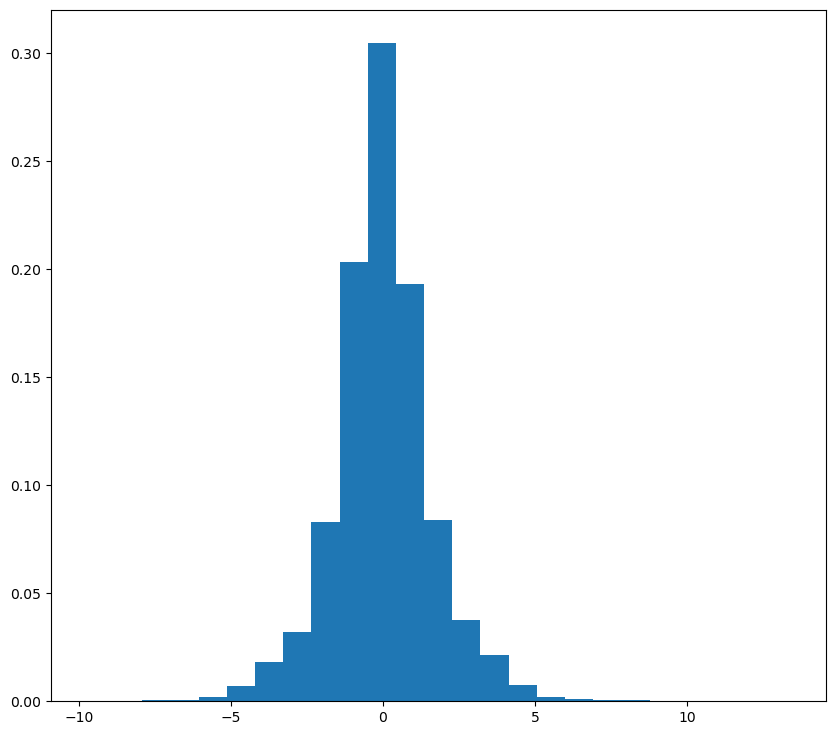

In [101]:
fig_hist_x, ax_hist_x = plt.subplots()
ax_hist_x.bar(arr_bins_x_centers, arr_vx_freqs, width = (arr_bins_x_centers[1] - arr_bins_x_centers[0]))

In [64]:
arr_bins_dense = np.linspace(np.min(arr_bins_x_centers), np.max(arr_bins_x_centers), num = N_bins * 100)

In [80]:
fx = interp1d(arr_bins_x_centers, arr_vx_freqs, kind = 'cubic')

In [81]:
arr_f_x_interp = fx(arr_bins_dense)

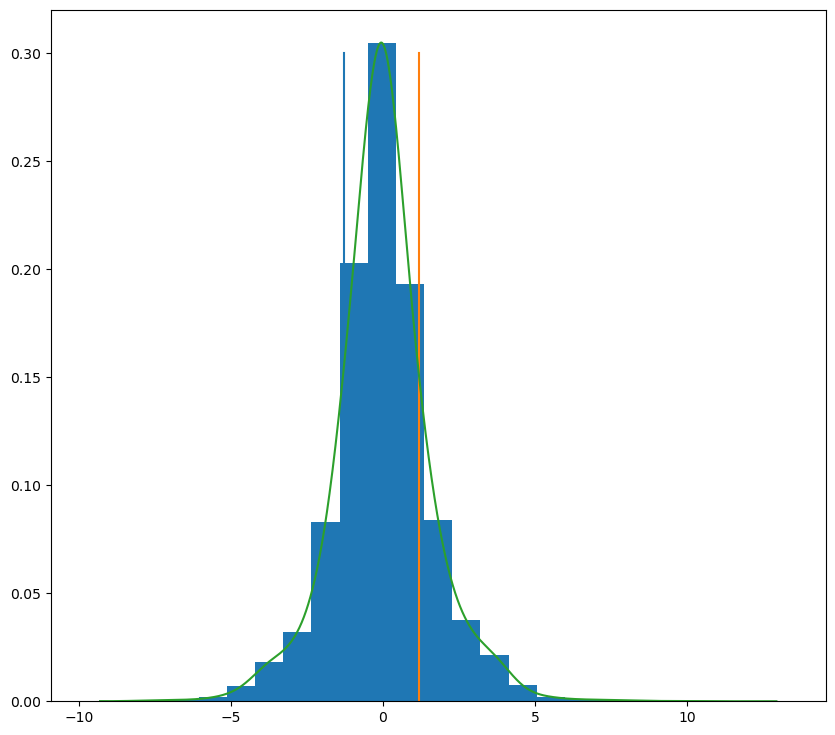

In [103]:
ax_hist_x.plot(arr_bins_dense, arr_f_x_interp)
fig_hist_x

In [99]:
f_vx_halfmax = np.max(arr_f_x_interp) / 2.0
arr_vx_above_halfmax = arr_bins_dense[(arr_f_x_interp > f_vx_halfmax)]
left_bound_vx = np.min(arr_vx_above_halfmax)
right_bound_vx = np.max(arr_vx_above_halfmax)
FWHM_vx = right_bound_vx - left_bound_vx
FWHM_vx


2.4637423884454783

In [110]:
#for Gaussian distribution, FWHM should coincide with
sigma_vx = np.std(df_vel['vx'])
sigma_vx * 2 * np.sqrt(2 * np.log(2))

3.2454045973223717

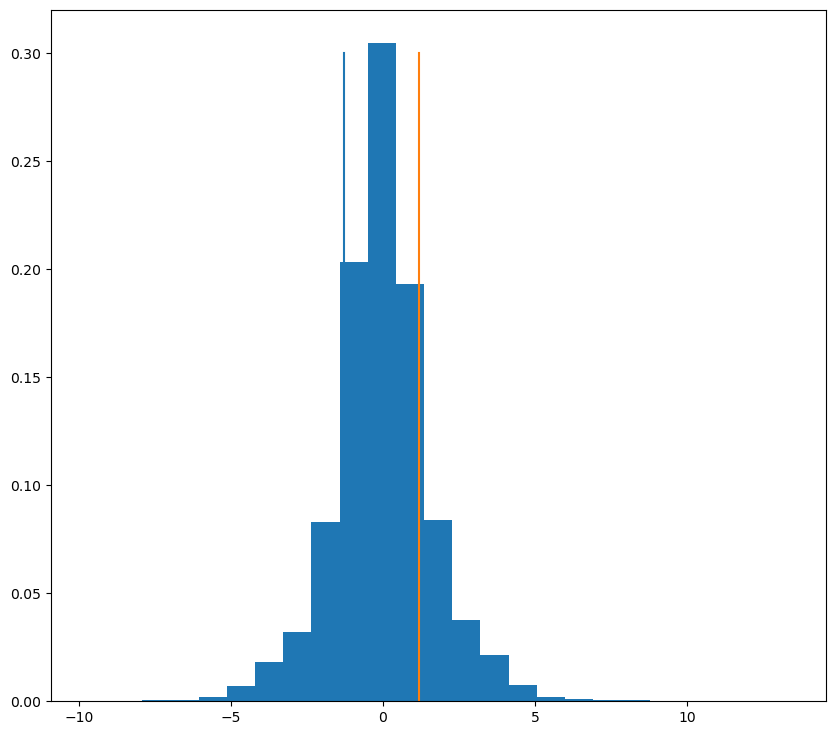

In [102]:
ax_hist_x.plot(np.zeros(50) + left_bound_vx, np.linspace(0, 0.3, num = 50))
ax_hist_x.plot(np.zeros(50) + right_bound_vx, np.linspace(0, 0.3, num = 50))
fig_hist_x

In [111]:
def get_temp(arr_1dvel):
    temper = False
    
    return temper